<a href="https://colab.research.google.com/github/pqminh27/MachineLearning/blob/main/Test_IndiaPuneHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [60]:
def Encode (df):
    for column in df.columns:
        if df[column].dtype != 'int64' and df[column].dtype != 'float64':
            enc = LabelEncoder()
            enc.fit(df[column])
            df[column] = enc.transform(df[column])
    return df

In [61]:
def lin_reg(x_train, x_test, y_train, y_test):
    reg = LinearRegression()
    print ('_________Linear Regression___________')
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    print (reg.intercept_, reg.coef_)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ', mean_absolute_percentage_error(y_test, y_pred))
    return y_pred

In [62]:
def near_neigh (x_train, x_test, y_train, y_test, n):
    reg = KNeighborsRegressor(n_neighbors=n)
    reg.fit(x_train, y_train)
    print ('_________KNeighbours____________')
    y_pred = reg.predict(x_test)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))
    return y_pred

In [63]:
def dec_tree(x_train, x_test, y_train, y_test, n):
    reg = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=7, max_depth = n) # минимальное разбиение
    reg.fit(x_train, y_train)
    print ('_________DecisionTree____________')
    y_pred = reg.predict(x_test)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))
    return y_pred

In [64]:
def rand_f (x_train, x_test, y_train, y_test):
    reg = RandomForestRegressor()
    reg.fit(x_train, y_train)
    print ('_________RandomForest_____________')
    y_pred = reg.predict(x_test)
    print ('R2 = ', r2_score(y_test, y_pred))
    print ('MAPE = ',mean_absolute_percentage_error(y_test, y_pred))
    return y_pred


In [65]:
df_Pune = pd.read_csv("/content/Pune house data.csv")
df_Bangalore = pd.read_csv("/content/Bangalore  house data.csv")
df_Bangalore['site_location'] = df_Bangalore['location']
df_Bangalore = df_Bangalore.drop('location', axis=1)
df_Bangalore

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Electronic City Phase II
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Chikka Tirupathi
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Uttarahalli
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Lingadheeranahalli
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Kothanur
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Whitefield
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Richards Town
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Raja Rajeshwari Nagar
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Padmanabhanagar


In [66]:
# df = pd.read_csv("/content/Pune house data.csv")
df = pd.concat([df_Pune, df_Bangalore], ignore_index=True, sort=False)
print(df.info())
print(df.describe())
print(df['price'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26640 entries, 0 to 26639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      26640 non-null  object 
 1   availability   26640 non-null  object 
 2   size           26608 non-null  object 
 3   society        15636 non-null  object 
 4   total_sqft     26640 non-null  object 
 5   bath           26494 non-null  float64
 6   balcony        25422 non-null  float64
 7   price          26640 non-null  float64
 8   site_location  26638 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.8+ MB
None
               bath       balcony         price
count  26494.000000  25422.000000  26640.000000
mean       2.692610      1.584376    112.565627
std        1.341433      0.817247    148.968878
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.00

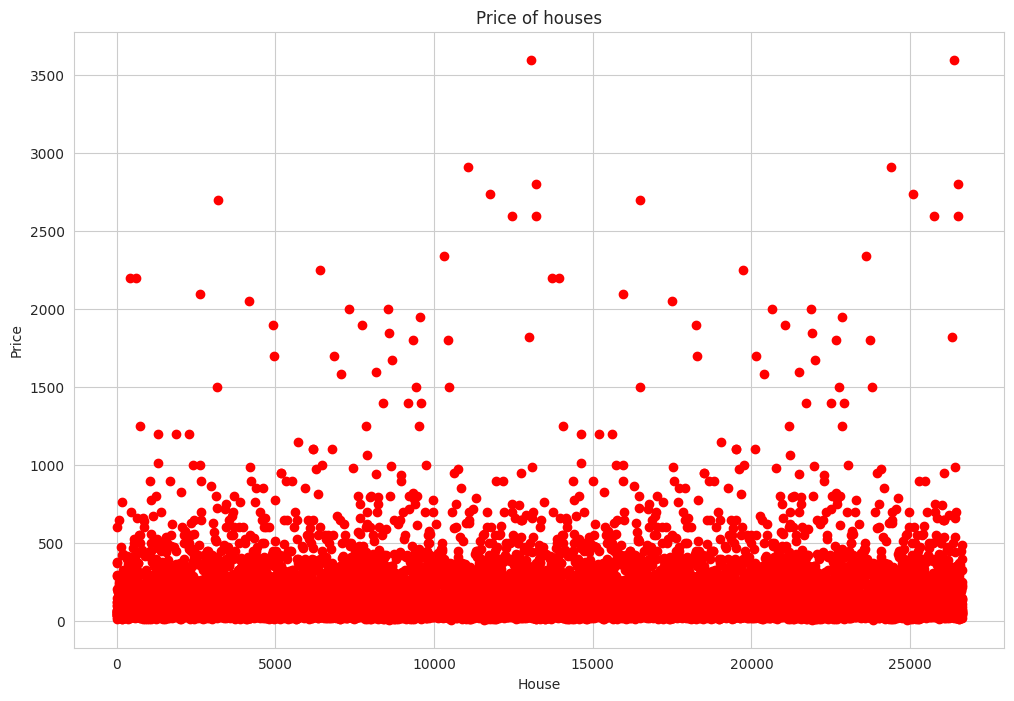

In [67]:
# Price of houses
plt.figure(figsize=(12,8))
y_prices = np.array(df['price'])
x_id = np.array(range(len(df)))
plt.scatter(x_id, y_prices, color = 'red')
plt.title('Price of houses')
plt.xlabel('House')
plt.ylabel('Price')
plt.savefig('HousePrices.png')
plt.show()
plt.close('all')

In [68]:
# PREPROCESSING, CLEAN DATA
# Since the total_sqft contains range values such as 1133-1384, filter out these values
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df["total_sqft"].apply(isFloat)]

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056.0,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440.0,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200.0,2.0,1.0,51.00,Aundh Road


In [69]:
# PREPROCESSING, CLEAN DATA
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

In [70]:
# Removing the rows in new_total_sqft column that hase None values
df.isna().sum()

area_type             0
availability          0
size                 32
society           11004
total_sqft           92
bath                146
balcony            1218
price                 0
site_location         2
price_per_sqft       92
dtype: int64

In [71]:
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,3699.810606
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4615.384615
2,Built-up Area,Ready To Move,3 BHK,NaN,1440.0,2.0,3.0,62.00,Anandnagar,4305.555556
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Aundh,6245.890861
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200.0,2.0,1.0,51.00,Aundh Road,4250.000000
...,...,...,...,...,...,...,...,...,...,...
26635,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,Whitefield,6689.834926
26636,Super built-up Area,Ready To Move,4 BHK,NaN,3600.0,5.0,NaN,400.00,Richards Town,11111.111111
26637,Built-up Area,Ready To Move,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,Raja Rajeshwari Nagar,5258.545136
26638,Super built-up Area,18-Jun,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,Padmanabhanagar,10407.336319


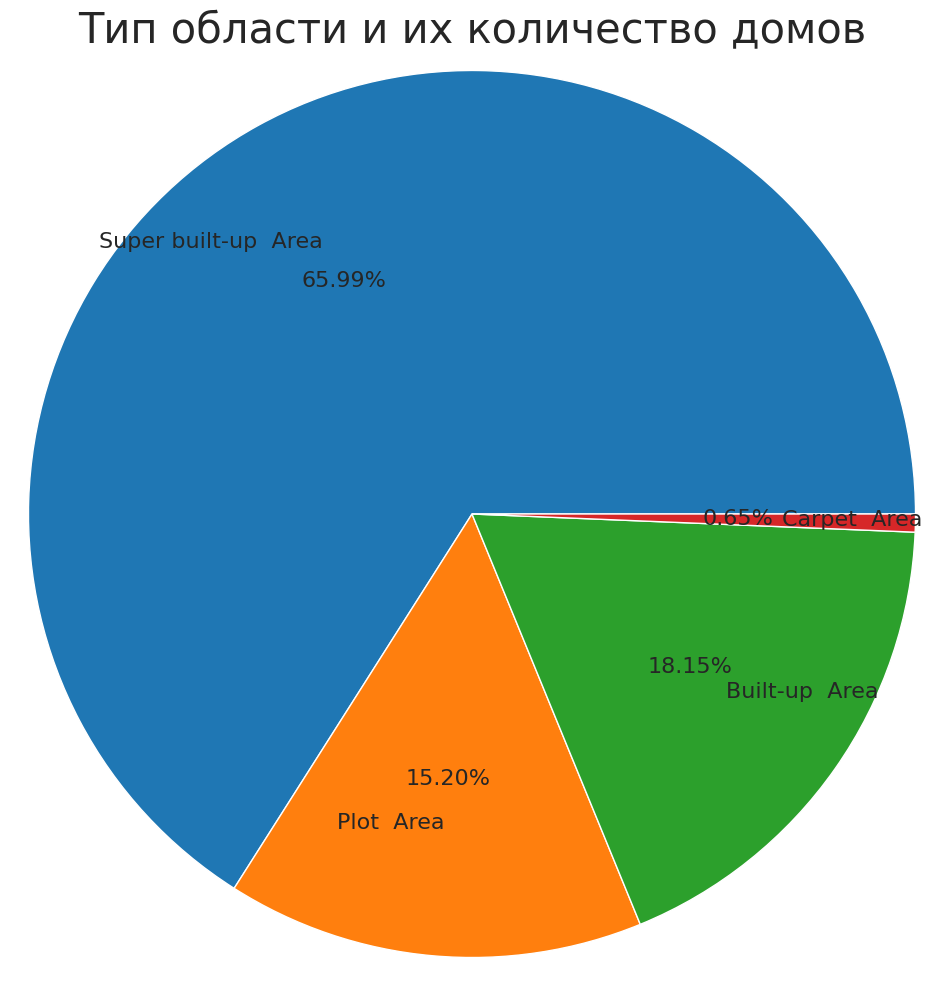

Super built-up  Area    17580
Plot  Area               4050
Built-up  Area           4836
Carpet  Area              174
Name: area_type, dtype: int64
26640
Super built-up  Area    0.659910
Plot  Area              0.152027
Built-up  Area          0.181532
Carpet  Area            0.006532
Name: area_type, dtype: float64


In [72]:
# Draw Pie Chart
plt.figure(figsize = (30, 12))
plt.subplot(1, 2, 1)
plt.title ('Area Type and Houses in dataset', fontdict = {'fontsize' : 30})

countOfEachRange = df['area_type'].value_counts(sort=False)
areaTypes = df['area_type'].unique()

def func(pct):
  return "{:1.2f}%".format(pct)

plt.pie(countOfEachRange/sum(countOfEachRange), labels = areaTypes, autopct=lambda pct: func(pct), labeldistance=0.7, radius=1.2, textprops={'fontsize': 16})
plt.title ('Тип области и их количество домов', fontdict = {'fontsize' : 30})
plt.show()
plt.savefig('PieChart.png')
plt.close('all')

print(countOfEachRange)
print(sum(countOfEachRange))
print(countOfEachRange/sum(countOfEachRange))

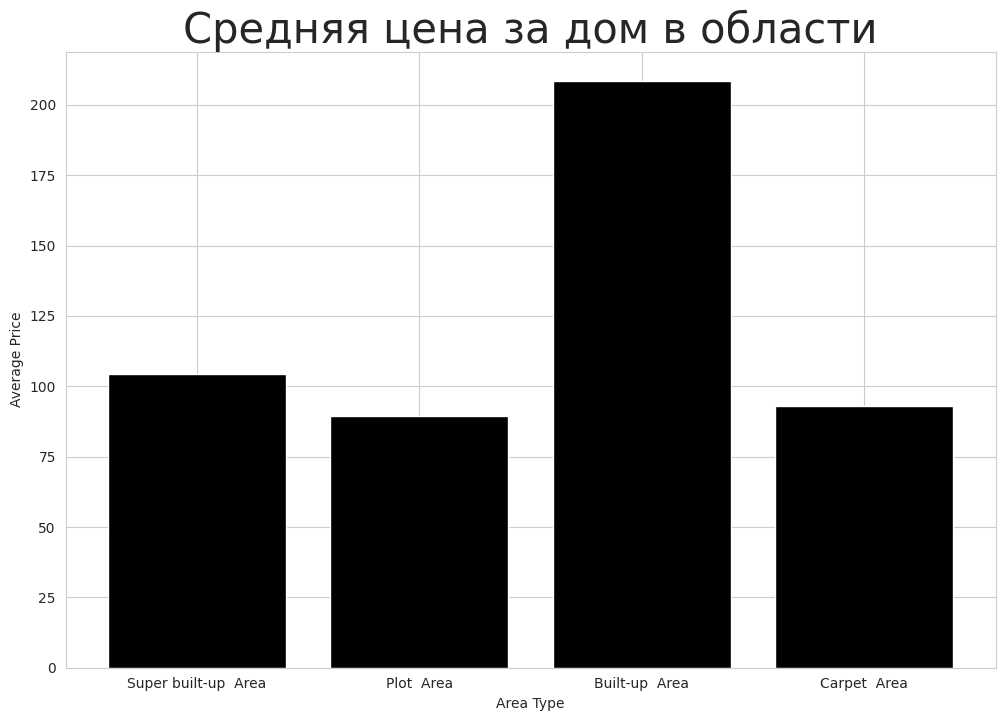

area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64

In [73]:
# Draw Bar Chart
avg_price_by_area_type = df.groupby("area_type")["price"].mean()
plt.figure(figsize = (12, 8))
plt.xlabel('Area Type')
plt.ylabel('Average Price', rotation='vertical')
plt.bar(areaTypes, avg_price_by_area_type, color='black')
plt.title ('Средняя цена за дом в области', fontdict = {'fontsize' : 30})
plt.show()
plt.savefig('BarChart_AvgPrice.png')
plt.close('all')
avg_price_by_area_type

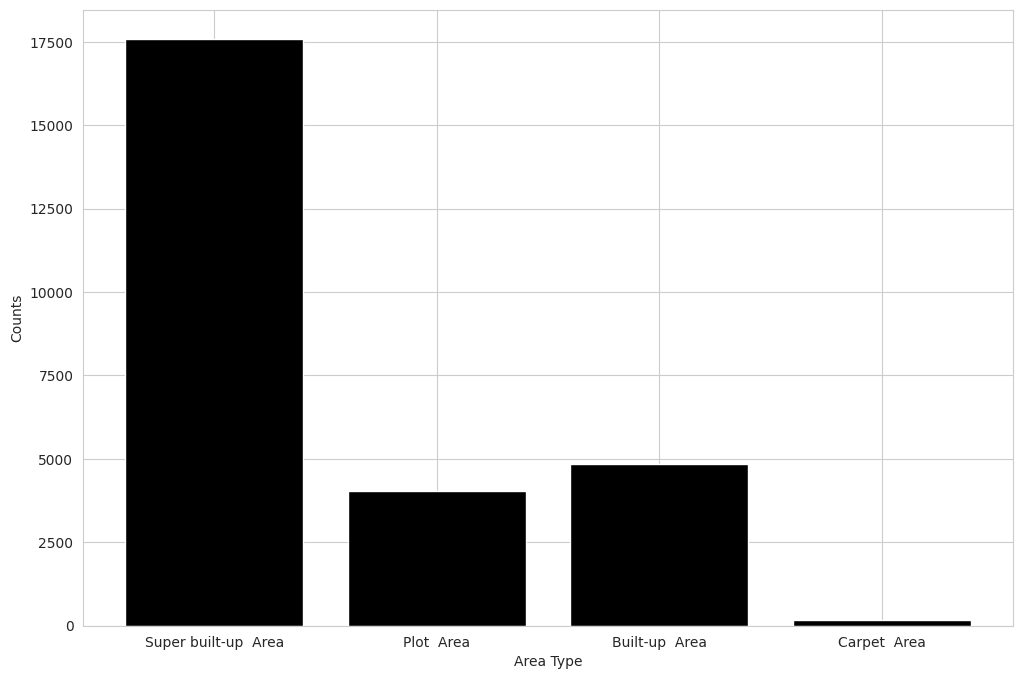

In [74]:
# Draw Bar Chart

plt.figure(figsize = (12, 8))
plt.xlabel('Area Type')
plt.ylabel('Counts', rotation='vertical')
plt.bar(areaTypes, countOfEachRange, color='black')
plt.show()
plt.savefig('BarChart.png')
plt.close('all')

In [75]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26640 entries, 0 to 26639
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       26640 non-null  object 
 1   availability    26640 non-null  object 
 2   size            26608 non-null  object 
 3   society         15636 non-null  object 
 4   total_sqft      26548 non-null  float64
 5   bath            26494 non-null  float64
 6   balcony         25422 non-null  float64
 7   price           26640 non-null  float64
 8   site_location   26638 non-null  object 
 9   price_per_sqft  26548 non-null  float64
dtypes: float64(5), object(5)
memory usage: 2.0+ MB


,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location,price_per_sqft
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056.0,2.0,1.0,39.07,Alandi Road,3699.810606
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4615.384615
2,Built-up Area,Ready To Move,3 BHK,NaN,1440.0,2.0,3.0,62.00,Anandnagar,4305.555556
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,Aundh,6245.890861
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200.0,2.0,1.0,51.00,Aundh Road,4250.000000
...,...,...,...,...,...,...,...,...,...,...
26635,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00,Whitefield,6689.834926
26636,Super built-up Area,Ready To Move,4 BHK,NaN,3600.0,5.0,NaN,400.00,Richards Town,11111.111111
26637,Built-up Area,Ready To Move,2 BHK,Mahla T,1141.0,2.0,1.0,60.00,Raja Rajeshwari Nagar,5258.545136
26638,Super built-up Area,18-Jun,4 BHK,SollyCl,4689.0,4.0,1.0,488.00,Padmanabhanagar,10407.336319


In [76]:
# PREPROCESSING, CLEAN DATA
df= df.drop(['society', 'availability'], axis='columns')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26640 entries, 0 to 26639
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       26640 non-null  object 
 1   size            26608 non-null  object 
 2   total_sqft      26548 non-null  float64
 3   bath            26494 non-null  float64
 4   balcony         25422 non-null  float64
 5   price           26640 non-null  float64
 6   site_location   26638 non-null  object 
 7   price_per_sqft  26548 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.6+ MB


In [78]:
# PREPROCESSING, CLEAN DATA
df = df.dropna()
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis='columns')

In [79]:
df

,area_type,total_sqft,bath,balcony,price,site_location,price_per_sqft,bhk
0,Super built-up Area,1056.0,2.0,1.0,39.07,Alandi Road,3699.810606,2
1,Plot Area,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4615.384615,4
2,Built-up Area,1440.0,2.0,3.0,62.00,Anandnagar,4305.555556,3
3,Super built-up Area,1521.0,3.0,1.0,95.00,Aundh,6245.890861,3
4,Super built-up Area,1200.0,2.0,1.0,51.00,Aundh Road,4250.000000,2
...,...,...,...,...,...,...,...,...
26634,Super built-up Area,1715.0,3.0,3.0,112.00,Green Glen Layout,6530.612245,3
26635,Built-up Area,3453.0,4.0,0.0,231.00,Whitefield,6689.834926,5
26637,Built-up Area,1141.0,2.0,1.0,60.00,Raja Rajeshwari Nagar,5258.545136,2
26638,Super built-up Area,4689.0,4.0,1.0,488.00,Padmanabhanagar,10407.336319,4


In [80]:
# PREPROCESSING, CLEAN DATA
df['area_type'] = df['area_type'].replace(['Super built-up  Area'], 0)
df['area_type'] = df['area_type'].replace(['Built-up  Area'], 1)
df['area_type'] = df['area_type'].replace(['Plot  Area'], 2)
df['area_type'] = df['area_type'].replace(['Carpet  Area'], 3)
df['area_type'].describe()

count    25336.000000
mean         0.487607
std          0.758560
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: area_type, dtype: float64

In [81]:
# PREPROCESSING, CLEAN DATA
df[df.bhk > 20]

,area_type,total_sqft,bath,balcony,price,site_location,price_per_sqft,bhk
1718,0,8000.0,27.0,0.0,230.0,Uruli Devachi,2875.0,27
4684,2,2400.0,40.0,0.0,660.0,Salunke Vihar,27500.0,43
15038,0,8000.0,27.0,0.0,230.0,2Electronic City Phase II,2875.0,27
18004,2,2400.0,40.0,0.0,660.0,Munnekollal,27500.0,43


In [82]:
# len(df[df.total_sqft/df.bhk > 300])
df = df[~(df.total_sqft/df.bhk < 300)]
df

,area_type,total_sqft,bath,balcony,price,site_location,price_per_sqft,bhk
0,0,1056.0,2.0,1.0,39.07,Alandi Road,3699.810606,2
1,2,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4615.384615,4
2,1,1440.0,2.0,3.0,62.00,Anandnagar,4305.555556,3
3,0,1521.0,3.0,1.0,95.00,Aundh,6245.890861,3
4,0,1200.0,2.0,1.0,51.00,Aundh Road,4250.000000,2
...,...,...,...,...,...,...,...,...
26634,0,1715.0,3.0,3.0,112.00,Green Glen Layout,6530.612245,3
26635,1,3453.0,4.0,0.0,231.00,Whitefield,6689.834926,5
26637,1,1141.0,2.0,1.0,60.00,Raja Rajeshwari Nagar,5258.545136,2
26638,0,4689.0,4.0,1.0,488.00,Padmanabhanagar,10407.336319,4


In [83]:
# PREPROCESSING, CLEAN DATA
def remove_price_per_square_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - std)) & (subdf.price_per_sqft <= (m + std))] # Filter in range [m - std, m + std]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df = remove_price_per_square_outliers(df)
df

,area_type,total_sqft,bath,balcony,price,site_location,price_per_sqft,bhk
0,0,1672.0,3.0,2.0,150.00,Devarabeesana Halli,8971.291866,3
1,1,1750.0,3.0,3.0,149.00,Devarabeesana Halli,8514.285714,3
2,0,1750.0,3.0,2.0,150.00,Devarabeesana Halli,8571.428571,3
3,0,1250.0,2.0,3.0,44.00,Devarachikkanahalli,3520.000000,3
4,0,1250.0,2.0,2.0,40.00,Devarachikkanahalli,3200.000000,2
...,...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,frazertown,11206.896552,3
19362,0,1780.0,3.0,1.0,84.83,manyata park,4765.730337,3
19363,2,880.0,2.0,1.0,48.00,tc.palya,5454.545455,2
19364,2,1000.0,2.0,1.0,55.00,tc.palya,5500.000000,2


In [84]:
# PREPROCESSING, CLEAN DATA
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis ='index')
df = remove_bhk_outliers(df)

In [85]:
df[df.bath > 10]
df[df.bath > df.bhk + 2]
df = df[df.bath < df.bhk + 2]
df

,area_type,total_sqft,bath,balcony,price,site_location,price_per_sqft,bhk
0,0,1672.0,3.0,2.0,150.00,Devarabeesana Halli,8971.291866,3
1,1,1750.0,3.0,3.0,149.00,Devarabeesana Halli,8514.285714,3
2,0,1750.0,3.0,2.0,150.00,Devarabeesana Halli,8571.428571,3
4,0,1250.0,2.0,2.0,40.00,Devarachikkanahalli,3200.000000,2
5,2,1200.0,2.0,2.0,83.00,Devarachikkanahalli,6916.666667,2
...,...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,frazertown,11206.896552,3
19362,0,1780.0,3.0,1.0,84.83,manyata park,4765.730337,3
19363,2,880.0,2.0,1.0,48.00,tc.palya,5454.545455,2
19364,2,1000.0,2.0,1.0,55.00,tc.palya,5500.000000,2


In [86]:
df['price_per_sqft'].describe()

count    14380.000000
mean      5849.643150
std       2071.867299
min       1250.000000
25%       4558.418344
50%       5551.601423
75%       6666.666667
max      34995.793775
Name: price_per_sqft, dtype: float64

In [87]:
df = df.drop("price_per_sqft", axis=1)

In [88]:
data_cor = df.copy()
data_cor

,area_type,total_sqft,bath,balcony,price,site_location,bhk
0,0,1672.0,3.0,2.0,150.00,Devarabeesana Halli,3
1,1,1750.0,3.0,3.0,149.00,Devarabeesana Halli,3
2,0,1750.0,3.0,2.0,150.00,Devarabeesana Halli,3
4,0,1250.0,2.0,2.0,40.00,Devarachikkanahalli,2
5,2,1200.0,2.0,2.0,83.00,Devarachikkanahalli,2
...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,frazertown,3
19362,0,1780.0,3.0,1.0,84.83,manyata park,3
19363,2,880.0,2.0,1.0,48.00,tc.palya,2
19364,2,1000.0,2.0,1.0,55.00,tc.palya,2


<ipython-input-89-8c2d38e4f6d2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


<Axes: >

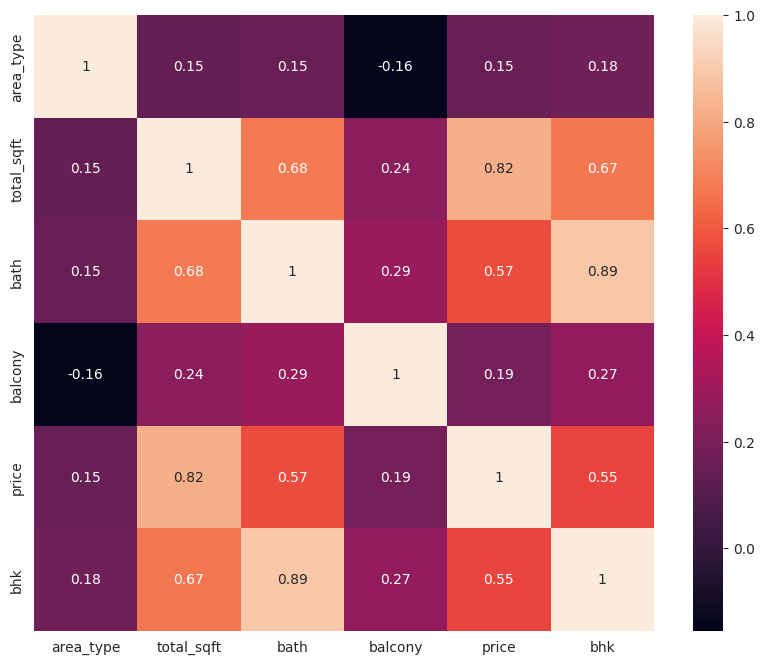

In [89]:
#Draw Heat map
corr_mat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True)

In [90]:
df

,area_type,total_sqft,bath,balcony,price,site_location,bhk
0,0,1672.0,3.0,2.0,150.00,Devarabeesana Halli,3
1,1,1750.0,3.0,3.0,149.00,Devarabeesana Halli,3
2,0,1750.0,3.0,2.0,150.00,Devarabeesana Halli,3
4,0,1250.0,2.0,2.0,40.00,Devarachikkanahalli,2
5,2,1200.0,2.0,2.0,83.00,Devarachikkanahalli,2
...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,frazertown,3
19362,0,1780.0,3.0,1.0,84.83,manyata park,3
19363,2,880.0,2.0,1.0,48.00,tc.palya,2
19364,2,1000.0,2.0,1.0,55.00,tc.palya,2


In [91]:
print(len(df.duplicated()))
# print(df.duplicated(subset='one', keep='first').sum())

14380


In [92]:

df = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13908 entries, 0 to 19365
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13908 non-null  int64  
 1   total_sqft     13908 non-null  float64
 2   bath           13908 non-null  float64
 3   balcony        13908 non-null  float64
 4   price          13908 non-null  float64
 5   site_location  13908 non-null  object 
 6   bhk            13908 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 869.2+ KB
None


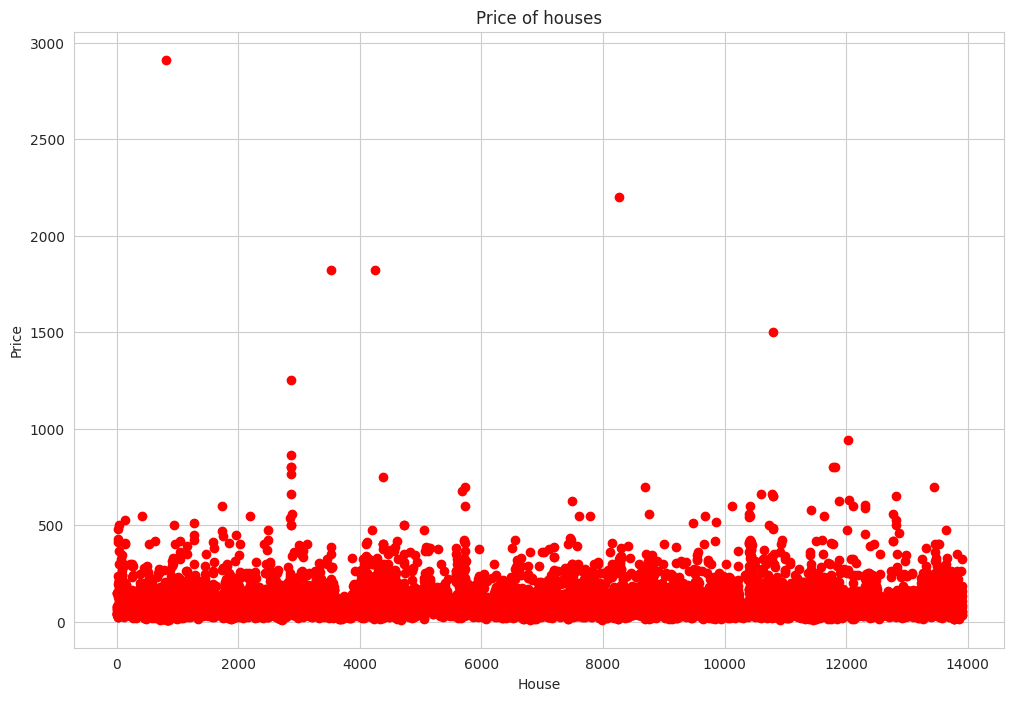

In [93]:
plt.figure(figsize=(12,8))
y_prices = np.array(df['price'])
x_id = np.array(range(len(df)))
plt.scatter(x_id, y_prices, color = 'red')
plt.title('Price of houses')
plt.xlabel('House')
plt.ylabel('Price')
plt.savefig('HousePrices2.png')
plt.show()
plt.close('all')

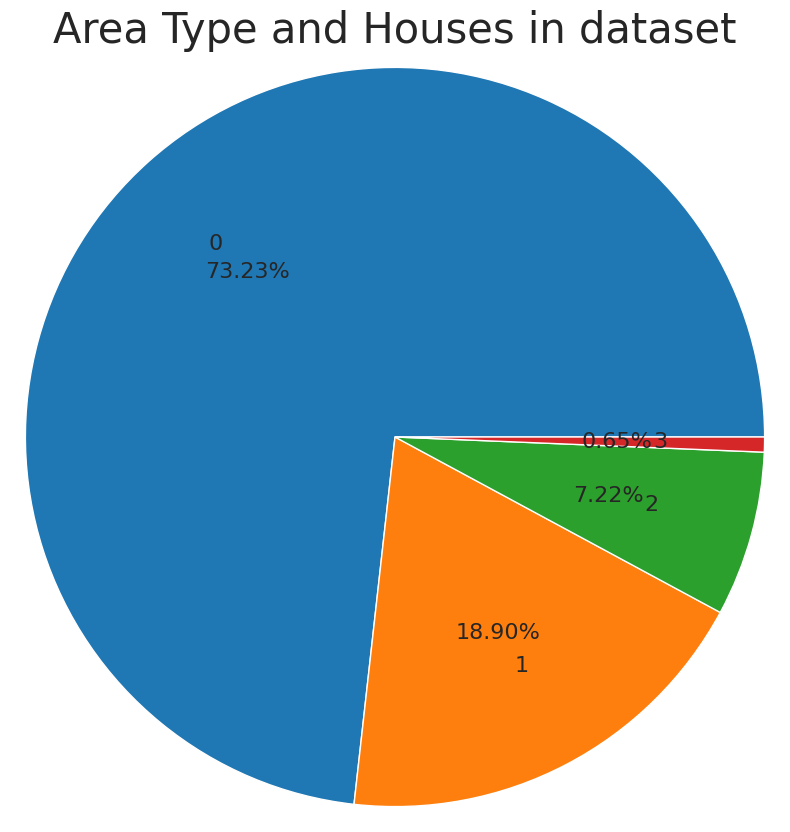

0    10185
1     2628
2     1004
3       91
Name: area_type, dtype: int64
13908
0    0.732312
1    0.188956
2    0.072189
3    0.006543
Name: area_type, dtype: float64


In [94]:
# Draw Pie Chart
plt.figure(figsize = (25, 10))
plt.subplot(1, 2, 1)
plt.title ('Area Type and Houses in dataset', fontdict = {'fontsize' : 30})

countOfEachRange = df['area_type'].value_counts(sort=False)
areaTypes = df['area_type'].unique()

def func(pct):
  return "{:1.2f}%".format(pct)

plt.pie(countOfEachRange/sum(countOfEachRange), labels = areaTypes, autopct=lambda pct: func(pct), labeldistance=0.7, radius=1.2, textprops={'fontsize': 16})
plt.show()
plt.savefig('PieChart2.png')
plt.close('all')

print(countOfEachRange)
print(sum(countOfEachRange))
print(countOfEachRange/sum(countOfEachRange))

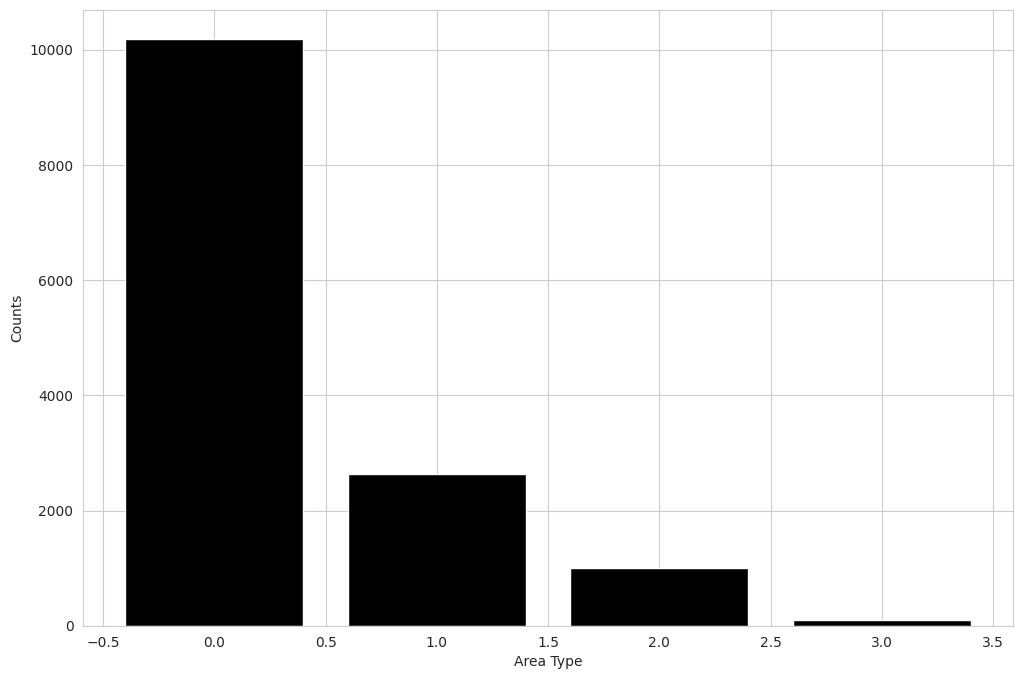

In [95]:
# Draw Bar Chart

plt.figure(figsize = (12, 8))
plt.xlabel('Area Type')
plt.ylabel('Counts', rotation='vertical')
plt.bar(areaTypes, countOfEachRange, color='black')
plt.show()
plt.savefig('BarChart2.png')
plt.close('all')

In [96]:
df.shape

(13908, 7)

In [97]:
df.describe()

,area_type,total_sqft,bath,balcony,price,bhk
count,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000,13908.000000
mean,0.352962,1442.842383,2.387475,1.557233,90.086286,2.457291
std,0.641907,788.799460,0.897849,0.794542,79.260918,0.874264
min,0.000000,300.000000,1.000000,0.000000,10.000000,1.000000
25%,0.000000,1085.000000,2.000000,1.000000,50.000000,2.000000
50%,0.000000,1250.000000,2.000000,2.000000,70.000000,2.000000
75%,1.000000,1626.150000,3.000000,2.000000,104.000000,3.000000
max,3.000000,30400.000000,13.000000,3.000000,2912.000000,13.000000


In [98]:
df.isnull().sum()

area_type        0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
bhk              0
dtype: int64

In [99]:
df['price'].describe()

count    13908.000000
mean        90.086286
std         79.260918
min         10.000000
25%         50.000000
50%         70.000000
75%        104.000000
max       2912.000000
Name: price, dtype: float64

[10097, 2992, 511, 182, 65, 29, 15, 5, 5, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13908


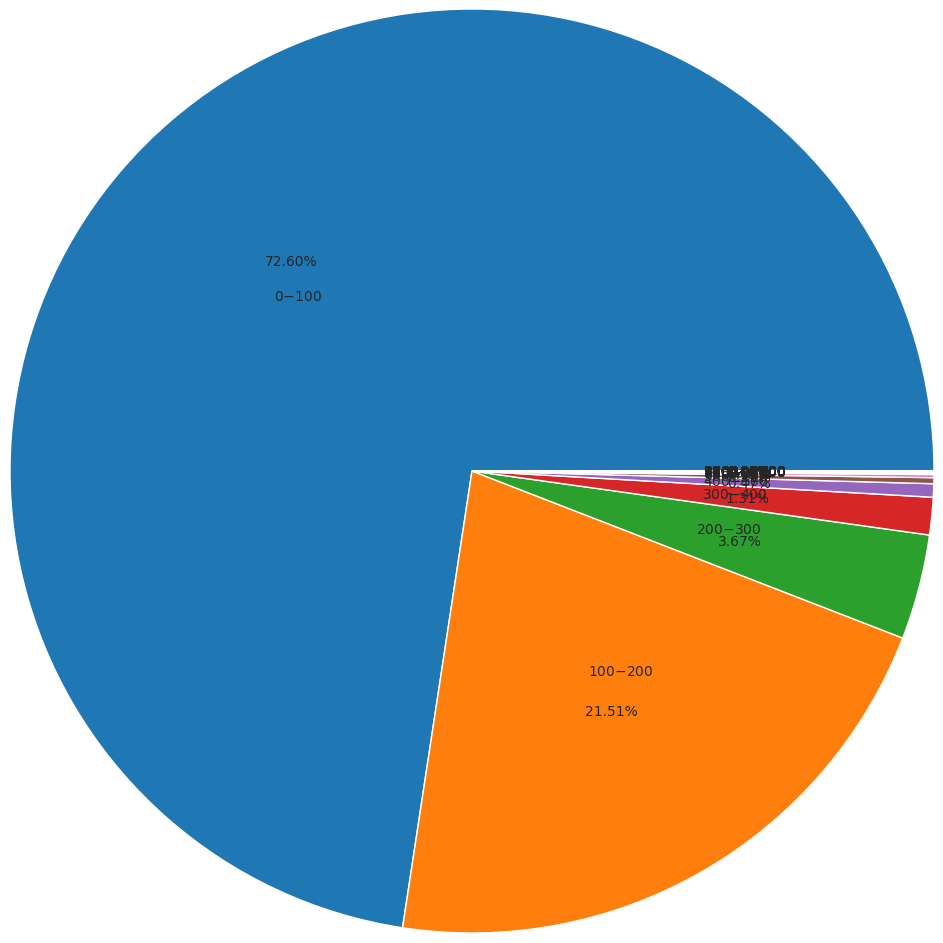

In [100]:
plt.figure(figsize = (25, 10))
plt.subplot(1, 2, 1)
# plt.title('pie chart')

countOfEachRange = []
i = 100.0
while i <= 4000.0:
  countOfEachRange.append(len(df[(df['price'] < i) & (df['price'] >= i - 100.0)]))
  i += 100.0

print(countOfEachRange)
print(sum(countOfEachRange))
labels=[f'{x * 100}$-{x * 100 + 100}$' for x in range(40)]

def func(pct):
  return "{:1.2f}%".format(pct)
plt.pie(countOfEachRange, labels=labels, autopct=lambda pct: func(pct), labeldistance=0.5, radius=1.5)
plt.show()
plt.savefig('PieChart3.png')
plt.close('all')

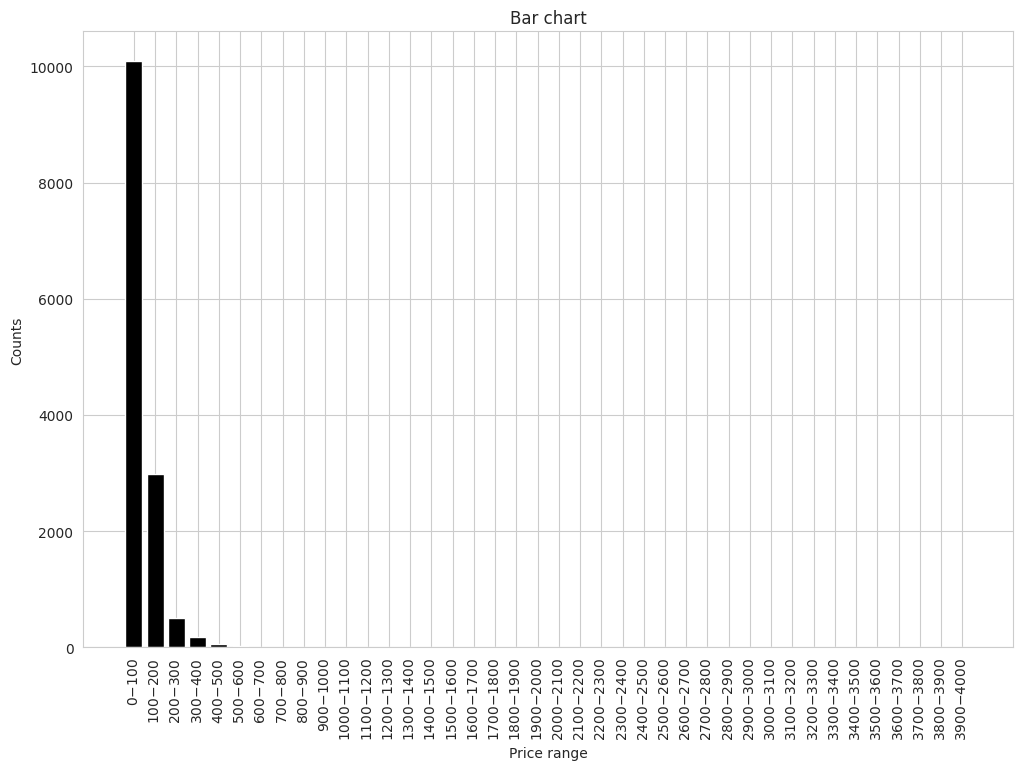

In [101]:
plt.figure(figsize = (12, 8))
plt.xlabel('Price range')
plt.ylabel('Counts', rotation='vertical')
plt.title('Bar chart')
plt.bar(labels, countOfEachRange, color='black')
plt.xticks(rotation=90)
plt.show()
plt.savefig('BarChart3.png')
plt.close('all')

In [102]:
# метод 3 сигм
df = df[df['price'] < 3*df['price'].std() + df['price'].mean()]
print(df.describe())


          area_type    total_sqft          bath       balcony         price  \
count  13688.000000  13688.000000  13688.000000  13688.000000  13688.000000   
mean       0.344755   1396.251013      2.360973      1.550190     83.769620   
std        0.633800    581.609640      0.870325      0.790345     50.919342   
min        0.000000    300.000000      1.000000      0.000000     10.000000   
25%        0.000000   1080.000000      2.000000      1.000000     50.000000   
50%        0.000000   1244.000000      2.000000      2.000000     70.000000   
75%        1.000000   1600.000000      3.000000      2.000000    100.000000   
max        3.000000   8840.000000     13.000000      3.000000    326.000000   

                bhk  
count  13688.000000  
mean       2.433080  
std        0.850251  
min        1.000000  
25%        2.000000  
50%        2.000000  
75%        3.000000  
max       13.000000  


In [103]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    bhk4 = df[(df.site_location==location) & (df.bhk==4)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price,marker='1', color='red',label='4 BHK', s=40)


    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title("price vs BHK size for {}".format(location))
    plt.legend()
    plt.grid(True)

def plot_reg_chart(df,location):
    sns.set_style(style="whitegrid")
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    bhk4 = df[(df.site_location==location) & (df.bhk==4)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    sns.regplot(x = bhk2.total_sqft ,y = bhk2.price , color='blue',label='2 BHK' ,ci=None)
    sns.regplot(x= bhk3.total_sqft , y = bhk3.price,marker='+', color='green',label='3 BHK',ci=None)
    sns.regplot(x=  bhk4.total_sqft,y = bhk4.price,marker='1', color='red',label='4 BHK',ci=None)

In [104]:
location_dummies = pd.get_dummies(df.site_location)

df_for_site_location = pd.merge(df, location_dummies, left_index=True, right_index=True) # inner join
df_for_site_location

,area_type,total_sqft,bath,balcony,price,site_location,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yerawada,Yeshwanthpur,frazertown,manyata park,tc.palya
0,0,1672.0,3.0,2.0,150.00,Devarabeesana Halli,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1750.0,3.0,3.0,149.00,Devarabeesana Halli,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1750.0,3.0,2.0,150.00,Devarabeesana Halli,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1250.0,2.0,2.0,40.00,Devarachikkanahalli,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1200.0,2.0,2.0,83.00,Devarachikkanahalli,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,frazertown,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19362,0,1780.0,3.0,1.0,84.83,manyata park,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19363,2,880.0,2.0,1.0,48.00,tc.palya,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19364,2,1000.0,2.0,1.0,55.00,tc.palya,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


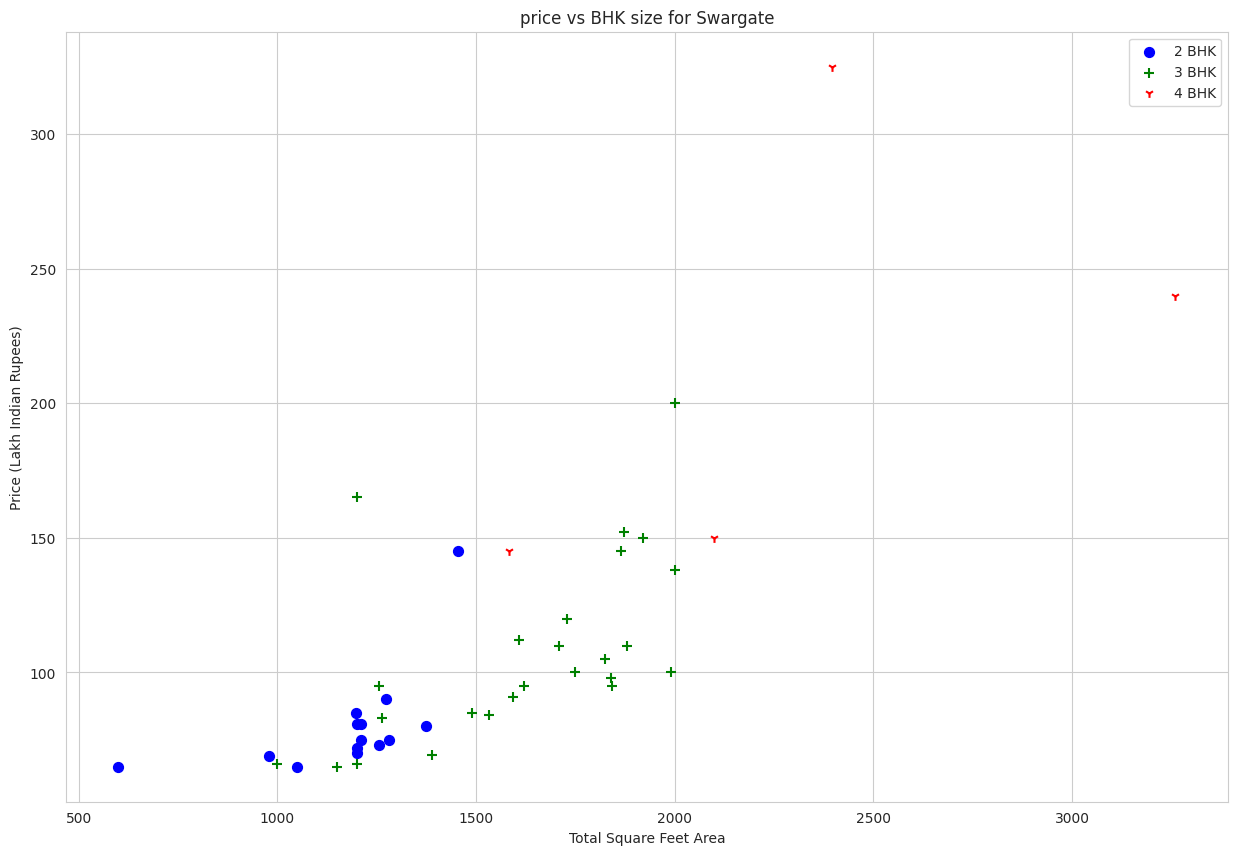

In [105]:
plot_scatter_chart(df_for_site_location, "Swargate")

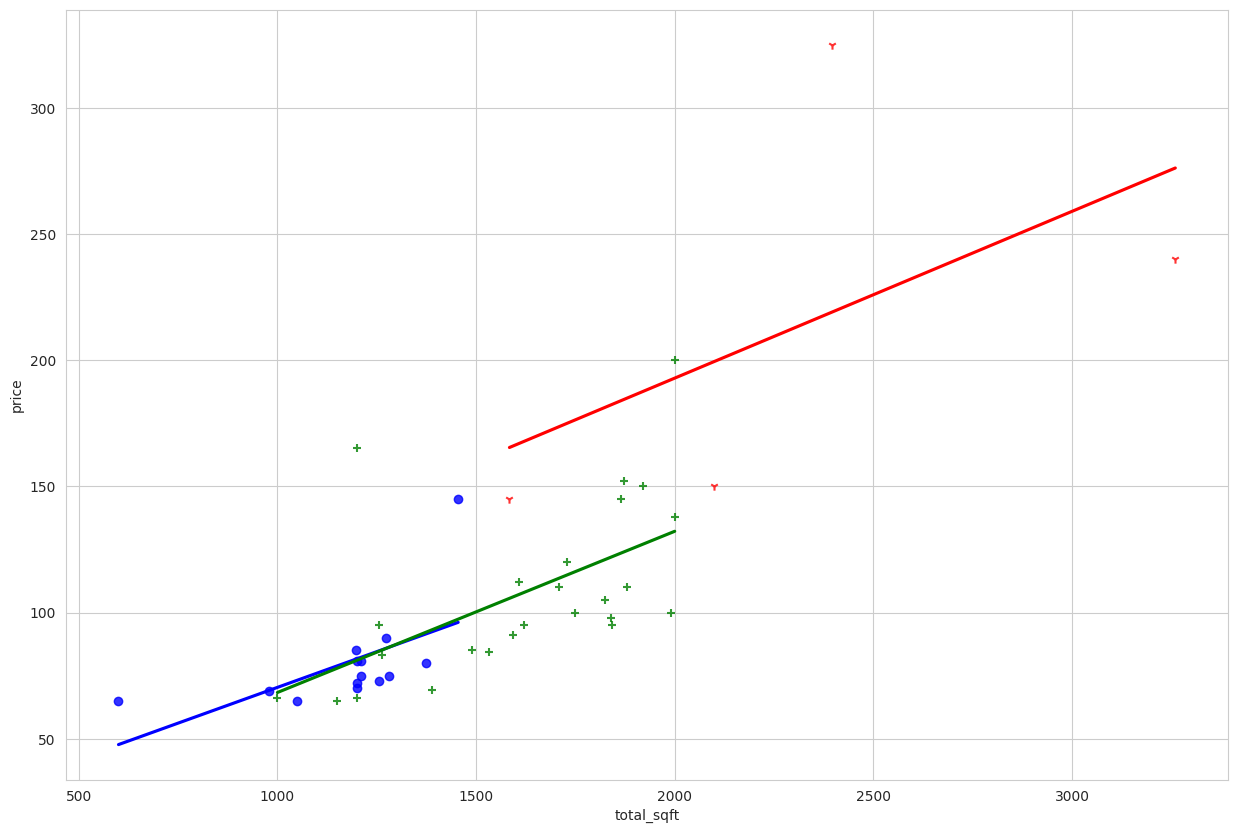

In [106]:
plot_reg_chart(df_for_site_location, "Swargate")

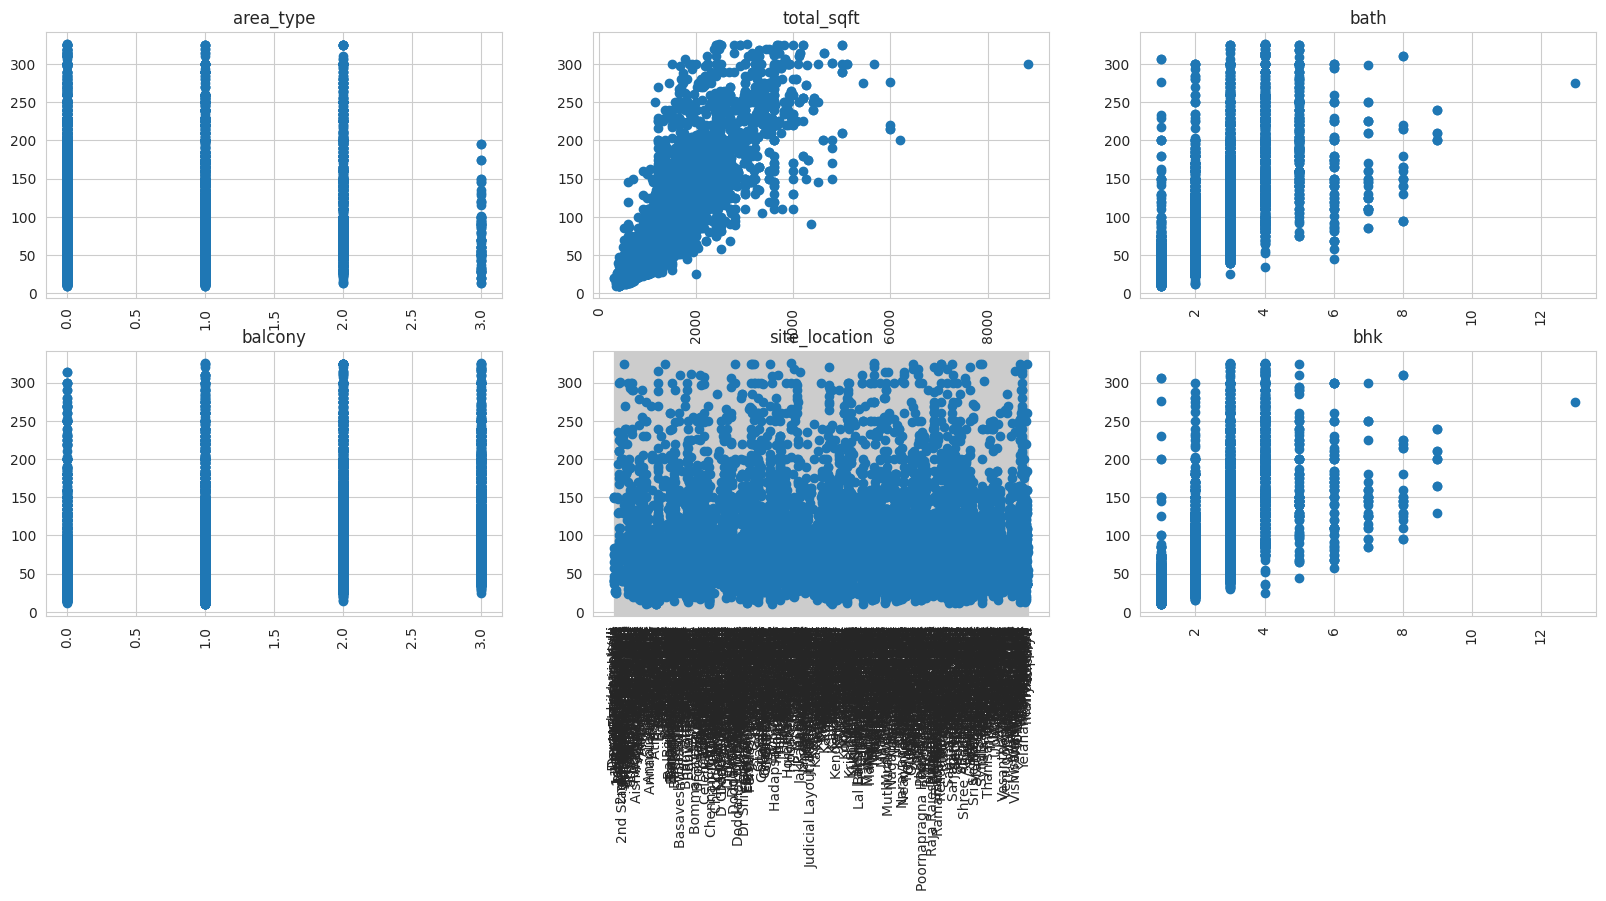

In [107]:
#  посмотрим графически степень влияния факторов
fig = plt.figure(figsize = (20, 20))
df_factors_without_price = df.drop("price", axis=1)
for i, item in enumerate(df_factors_without_price, start = 1):
    graf = fig.add_subplot(5, 3, i)
    plt.scatter(df[item], df['price'])
    plt.xticks(rotation=90)
    graf.set_title(item)
plt.savefig('Factors.png')
plt.show()
plt.close('all')

<ipython-input-108-04497d4ab9b6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())
<ipython-input-108-04497d4ab9b6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), cbar = False, annot = True)


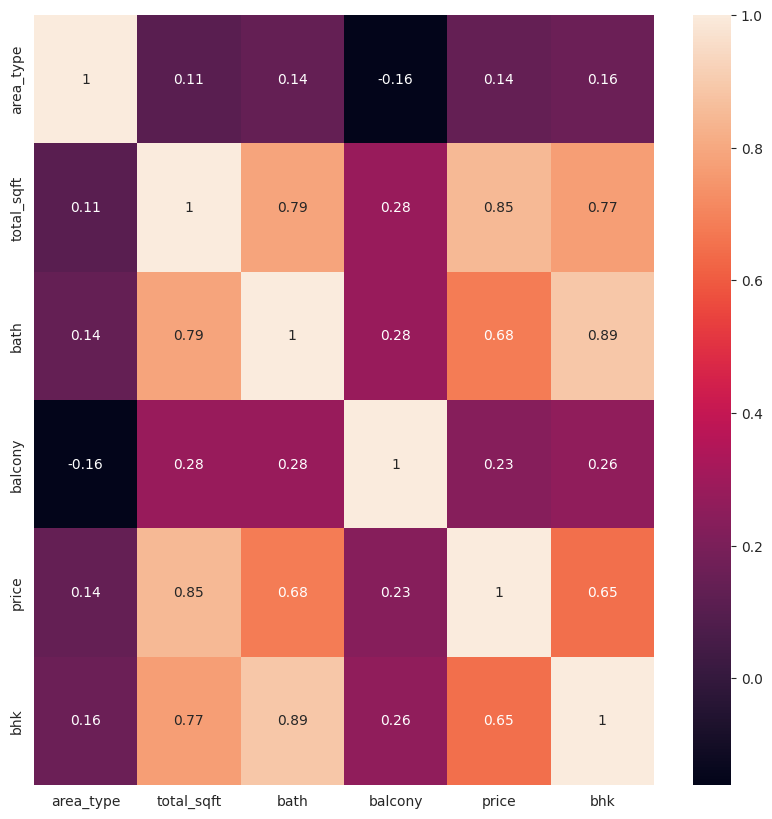

In [108]:
# корреляция
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr())
sns.heatmap(df.corr().round(2), cbar = False, annot = True)
plt.savefig('СorrMatrix.png')
plt.show()
plt.close('all')
# bhk(bedroom, hall, kitchen) bath сильно коррелируют между собой
# на price влиаяет total_sqft

In [109]:
df.describe()

,area_type,total_sqft,bath,balcony,price,bhk
count,13688.000000,13688.000000,13688.000000,13688.000000,13688.000000,13688.000000
mean,0.344755,1396.251013,2.360973,1.550190,83.769620,2.433080
std,0.633800,581.609640,0.870325,0.790345,50.919342,0.850251
min,0.000000,300.000000,1.000000,0.000000,10.000000,1.000000
25%,0.000000,1080.000000,2.000000,1.000000,50.000000,2.000000
50%,0.000000,1244.000000,2.000000,2.000000,70.000000,2.000000
75%,1.000000,1600.000000,3.000000,2.000000,100.000000,3.000000
max,3.000000,8840.000000,13.000000,3.000000,326.000000,13.000000


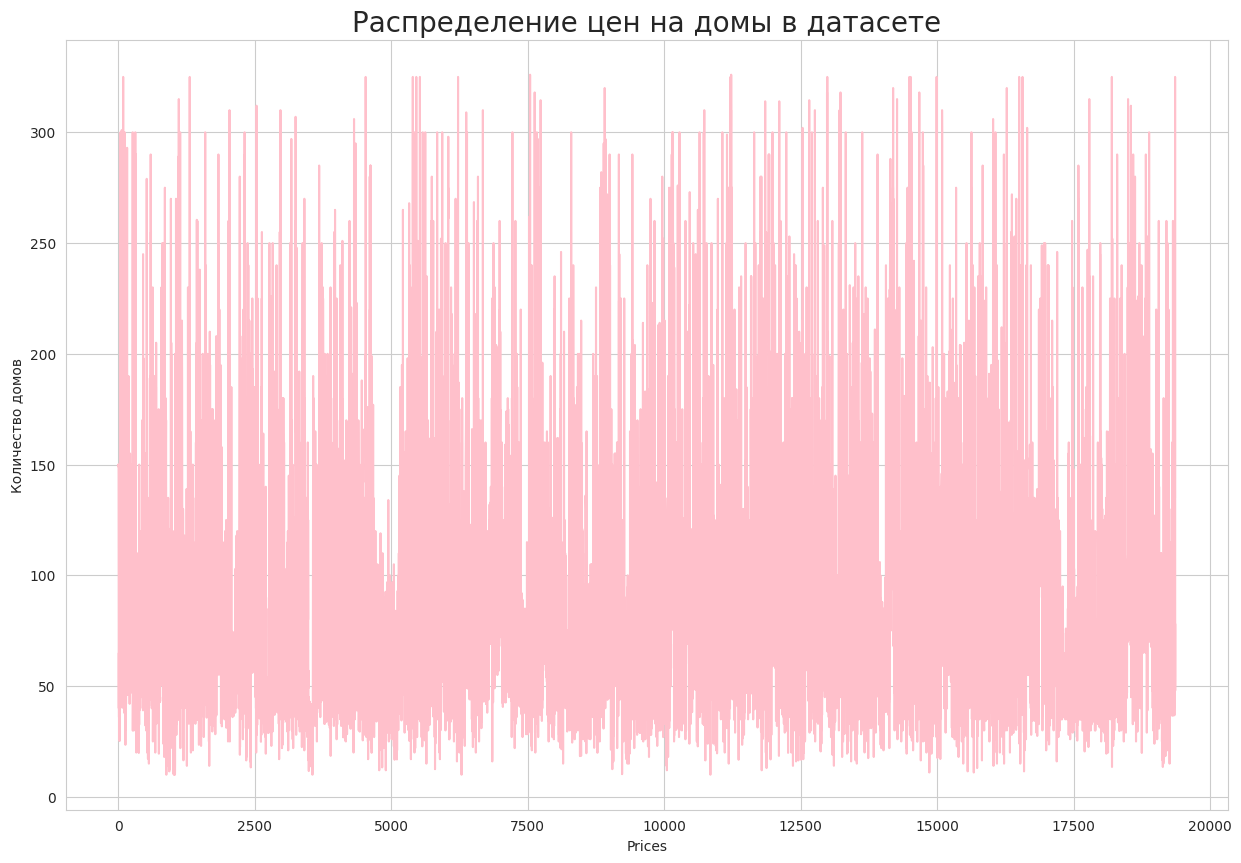

In [110]:
plt.figure(figsize = (15, 10))
plt.plot(df['price'], color = 'pink')
plt.xlabel('Prices', fontdict = {'fontsize' : 10})
plt.ylabel('Количество домов', fontdict = {'fontsize' : 10})
plt.title('Распределение цен на домы в датасете', fontdict = {'fontsize' : 20})
plt.savefig('Prices.png')
plt.show()

In [111]:
location_dummies = pd.get_dummies(df.site_location)
df_for_site_location = pd.merge(df, location_dummies, left_index=True, right_index=True) # inner join
df_for_site_location

,area_type,total_sqft,bath,balcony,price,site_location,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yerawada,Yeshwanthpur,frazertown,manyata park,tc.palya
0,0,1672.0,3.0,2.0,150.00,Devarabeesana Halli,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1750.0,3.0,3.0,149.00,Devarabeesana Halli,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1750.0,3.0,2.0,150.00,Devarabeesana Halli,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1250.0,2.0,2.0,40.00,Devarachikkanahalli,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1200.0,2.0,2.0,83.00,Devarachikkanahalli,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,frazertown,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19362,0,1780.0,3.0,1.0,84.83,manyata park,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19363,2,880.0,2.0,1.0,48.00,tc.palya,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19364,2,1000.0,2.0,1.0,55.00,tc.palya,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
df_for_site_location = df_for_site_location.drop("site_location", axis=1)
df_for_site_location

,area_type,total_sqft,bath,balcony,price,bhk,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,...,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yerawada,Yeshwanthpur,frazertown,manyata park,tc.palya
0,0,1672.0,3.0,2.0,150.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1750.0,3.0,3.0,149.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1750.0,3.0,2.0,150.00,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1250.0,2.0,2.0,40.00,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,1200.0,2.0,2.0,83.00,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19362,0,1780.0,3.0,1.0,84.83,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19363,2,880.0,2.0,1.0,48.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19364,2,1000.0,2.0,1.0,55.00,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [113]:
df

,area_type,total_sqft,bath,balcony,price,site_location,bhk
0,0,1672.0,3.0,2.0,150.00,Devarabeesana Halli,3
1,1,1750.0,3.0,3.0,149.00,Devarabeesana Halli,3
2,0,1750.0,3.0,2.0,150.00,Devarabeesana Halli,3
4,0,1250.0,2.0,2.0,40.00,Devarachikkanahalli,2
5,2,1200.0,2.0,2.0,83.00,Devarachikkanahalli,2
...,...,...,...,...,...,...,...
19361,0,2900.0,3.0,2.0,325.00,frazertown,3
19362,0,1780.0,3.0,1.0,84.83,manyata park,3
19363,2,880.0,2.0,1.0,48.00,tc.palya,2
19364,2,1000.0,2.0,1.0,55.00,tc.palya,2


In [114]:
df_y_factors = df_for_site_location['price']
df_x_factors = df_for_site_location.drop("price", axis=1)
df_x_factors_without_site_location = df.drop(["site_location","price"], axis=1)
df_y_factors
# df_x_factors_without_site_location

0        150.00
1        149.00
2        150.00
4         40.00
5         83.00
          ...  
19361    325.00
19362     84.83
19363     48.00
19364     55.00
19365     78.00
Name: price, Length: 13688, dtype: float64

In [115]:
x_train_without_site_location, x_test_without_site_location, y_train_without_site_location, y_test_without_site_location = train_test_split(df_x_factors_without_site_location, df_y_factors, train_size=0.8, random_state=1)
y_pred1_without_site_location = lin_reg(x_train_without_site_location, x_test_without_site_location, y_train_without_site_location, y_test_without_site_location)

x_train, x_test, y_train, y_test = train_test_split(df_x_factors, df_y_factors, train_size = 0.8, random_state = 1)
# y_pred1 = lin_reg(x_train, x_test, y_train, y_test)
y_pred2 = near_neigh(x_train, x_test, y_train, y_test, 1)
y_pred3 = dec_tree(x_train, x_test, y_train, y_test, 10)
y_pred4 = rand_f(x_train, x_test, y_train, y_test)

_________Linear Regression___________
-19.88096644497317 [ 4.07694415  0.07525249  4.62058628  0.19722057 -5.78312683]
R2 =  0.7147676117421378
MAPE =  0.22739852209732953
_________KNeighbours____________
R2 =  0.7205906561555806
MAPE =  0.18625107586320683
_________DecisionTree____________
R2 =  0.7758695096826007
MAPE =  0.20124526962105668
_________RandomForest_____________
R2 =  0.8198990853556298
MAPE =  0.1668661380426828
